<a href="https://colab.research.google.com/github/KubaWinsztal/MachineLearning/blob/main/PD5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KOD Z ZAJĘĆ**

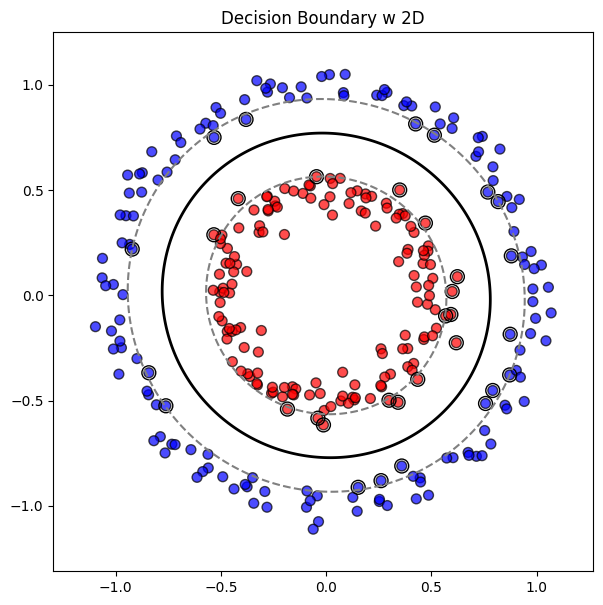

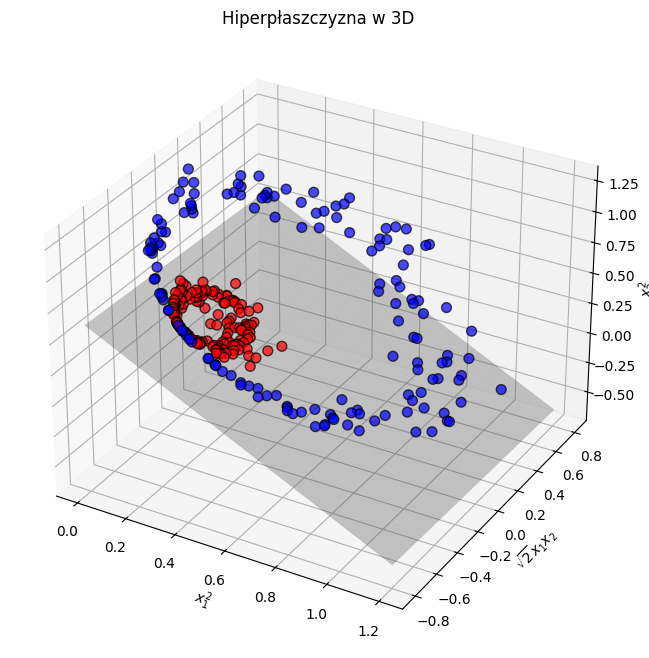

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)
y = np.where(y == 0, -1, 1)  # Konwersja etykiet na -1 i 1

# Trenujemy SVM z jądrem wielomianowym stopnia 2
clf = SVC(kernel='poly', degree=2, C=1.0, gamma=1)
clf.fit(X, y)

# 2. Wizualizacja w 2D

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.2, X[:, 0].max()+0.2, 500),
    np.linspace(X[:, 1].min()-0.2, X[:, 1].max()+0.2, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
decision = clf.decision_function(grid).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)
plt.contour(xx, yy, decision, levels=[0], colors='k', linewidths=2)
plt.contour(xx, yy, decision, levels=[-1, 1], linestyles='--', colors='grey')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')
plt.title('Decision Boundary w 2D')
plt.gca().set_aspect('equal')
plt.show()


# 3. Transformacja do 3D i obliczenia hiperpłaszczyzny

# Definicja transformacji φ(x) = [x₁², √2 x₁x₂, x₂²]
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# Transformacja danych i support vectors
phi_X = np.array([phi(x) for x in X])
phi_support = np.array([phi(x) for x in clf.support_vectors_])

# Obliczanie wag hiperpłaszczyzny (w = Σ α_i y_i φ(x_i))
w = np.sum(clf.dual_coef_[0].reshape(-1, 1) * phi_support, axis=0)
b = clf.intercept_[0]


# 4. Wizualizacja 3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot danych w 3D
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2], c=y, cmap='bwr', edgecolors='k', s=50, alpha=0.7)

# Generowanie siatki dla hiperpłaszczyzny
x_range = np.linspace(phi_X[:, 0].min(), phi_X[:, 0].max(), 20)
y_range = np.linspace(phi_X[:, 1].min(), phi_X[:, 1].max(), 20)
xx_3d, yy_3d = np.meshgrid(x_range, y_range)
zz_3d = (-w[0]*xx_3d - w[1]*yy_3d - b) / w[2]  # Równanie płaszczyzny

# Plot hiperpłaszczyzny
ax.plot_surface(xx_3d, yy_3d, zz_3d, alpha=0.3, color='grey')

ax.set_xlabel('$x_1^2$'), ax.set_ylabel('$\sqrt{2}x_1x_2$'), ax.set_zlabel('$x_2^2$')
ax.set_title('Hiperpłaszczyzna w 3D')
plt.show()

**ANIMACJA**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML



# 4. Zaawansowana wizualizacja 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Siatka przestrzeni 3D
grid_3d = np.array([phi(x) for x in np.meshgrid(np.linspace(-1.5, 1.5, 50),
                                               np.linspace(-1.5, 1.5, 50))[0].reshape(-1, 2)])

# Wizualizacja zakrzywionej przestrzeni
ax.scatter(grid_3d[:, 0], grid_3d[:, 1], grid_3d[:, 2],
           c='lightblue', alpha=0.15, s=1, label='Przestrzeń cech')

# Linie pomocnicze
for val in np.linspace(-1.5, 1.5, 15):
    line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
    phi_line = np.array([phi(p) for p in line])
    ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2], 'gray', alpha=0.1)

# Dane i hiperpłaszczyzna
ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
           c=y, cmap='bwr', edgecolors='k', s=60, alpha=0.9, label='Dane')

# Granica decyzyjna w 3D
xx_3d, yy_3d = np.meshgrid(np.linspace(0, 2.5, 50), np.linspace(-3, 3, 50))
zz_3d = (-w[0]*xx_3d - w[1]*yy_3d - b)/w[2]
ax.plot_surface(xx_3d, yy_3d, zz_3d, alpha=0.4, color='green', label='Hiperpłaszczyzna')

ax.set_xlabel('$x_1^2$', fontsize=12)
ax.set_ylabel('$\sqrt{2}x_1x_2$', fontsize=12)
ax.set_zlabel('$x_2^2$', fontsize=12)
ax.set_title('Odwzorowanie φ(x) w 3D z hiperpłaszczyzną decyzyjną', fontsize=14)
plt.legend()
plt.tight_layout()

# Animacja obrotu
def rotate(angle):
    ax.view_init(elev=20, azim=angle)

ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=50)
plt.close()
HTML(ani.to_html5_video())

Niestety animacja bardzo długo się wczytuje, więc załączam link do google drive'a, gdzie można obejrzeć animację.

**LINK** : https://drive.google.com/file/d/10V0PvE6yGVWgMp47p7XLdLOt9TVcdkjd/view?usp=sharing

dodatkowo, zamieszczam poniżej komórkę, która będzie generowała już nieanimowaną werjsę wykresu

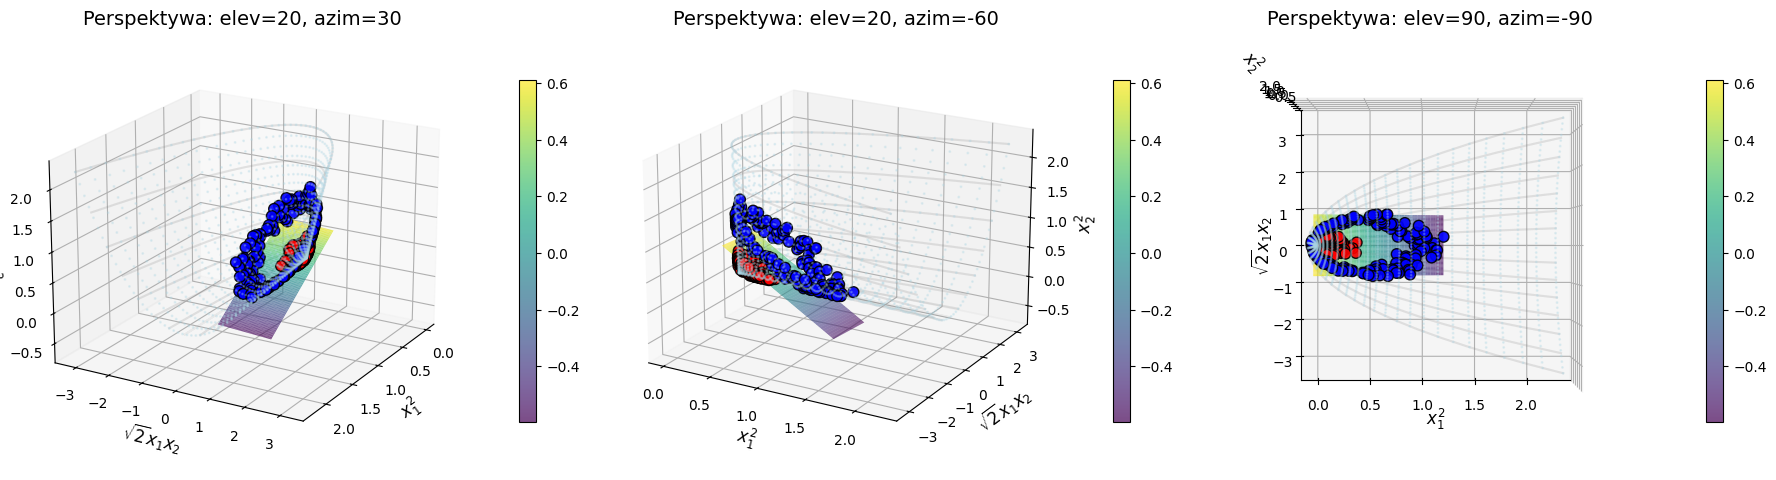

In [3]:
# Przygotowanie siatki dla tła (odwzorowanie φ dla punktów z przestrzeni 2D)
x_vals = np.linspace(-1.5, 1.5, 50)
y_vals = np.linspace(-1.5, 1.5, 50)
mesh_x, mesh_y = np.meshgrid(x_vals, y_vals)
mesh_points = np.column_stack([mesh_x.ravel(), mesh_y.ravel()])
grid_3d = np.array([phi(p) for p in mesh_points])

# Przygotowanie siatki dla rysowania hiperpłaszczyzny decyzyjnej w przestrzeni φ
xx_3d, yy_3d = np.meshgrid(np.linspace(phi_X[:, 0].min(), phi_X[:, 0].max(), 50),
                            np.linspace(phi_X[:, 1].min(), phi_X[:, 1].max(), 50))
zz_3d = (-w[0] * xx_3d - w[1] * yy_3d - b) / w[2]

# Tworzenie statycznych wykresów z 3 różnymi perspektywami
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})
# Lista perspektyw: (elevacja, azymut)
views = [(20, 30), (20, -60), (90, -90)]

for ax, (elev, azim) in zip(axs, views):
    # Tło – siatka punktów odwzorowanych przez φ
    ax.scatter(grid_3d[:, 0], grid_3d[:, 1], grid_3d[:, 2],
               c='lightblue', alpha=0.15, s=1)
    # Linie pomocnicze ilustrujące zakrzywienie przestrzeni cech
    for val in np.linspace(-1.5, 1.5, 15):
        line = np.array([[x, val] for x in np.linspace(-1.5, 1.5, 30)])
        phi_line = np.array([phi(p) for p in line])
        ax.plot(phi_line[:, 0], phi_line[:, 1], phi_line[:, 2],
                color='gray', alpha=0.1)

    # Dane przetransformowane do przestrzeni cech
    ax.scatter(phi_X[:, 0], phi_X[:, 1], phi_X[:, 2],
               c=y, cmap='bwr', edgecolors='k', s=60, alpha=0.9)

    surf = ax.plot_surface(xx_3d, yy_3d, zz_3d, alpha=0.7, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, ax=ax, shrink=0.6, aspect=20, pad=0.1)



    ax.set_xlabel('$x_1^2$', fontsize=12)
    ax.set_ylabel('$\\sqrt{2}x_1x_2$', fontsize=12)
    ax.set_zlabel('$x_2^2$', fontsize=12)
    ax.set_title(f'Perspektywa: elev={elev}, azim={azim}', fontsize=14)
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


**ODPOWIEDŹ NA PYTANIE 1**

Granica decyzyjna SVM jest matematycznie wyznaczona jako liniowa hiperpłaszczyzna w przestrzeni cech 3D, opisana równaniem


$\mathbf{w}^T \, \Phi(x) + b = 0, $

gdzie funkcja transformacji (parametryzacja) jest dana wzorem

$
\Phi(x) = \begin{bmatrix}
x_1^2 \\
\sqrt{2}\, x_1 x_2 \\
x_2^2
\end{bmatrix}.
$

Dane pochodzą z przestrzeni 2D i zostają przekształcone do przestrzeni 3D przez funkcję $\Phi$, co powoduje, że leżą one na zakrzywionej powierzchni -- paraboloidzie w $\mathbb{R}^3$. W rezultacie:

Po przekształceniu cały zbiór danych ogranicza się do tej zakrzywionej powierzchni, a nie rozciąga się na całą przestrzeń 3D.
    
Choć SVM tworzy liniową hiperpłaszczyznę w całej przestrzeni 3D, na wykresie widzimy tylko jej przecięcie z paraboloidą, na której znajdują się nasze dane. To przecięcie, przy odpowiedniej orientacji, przyjmuje postać zakrzywionej krzywej (np. elipsy).

Efekt wizualny nieliniowości wynika z faktu, że obserwujemy tylko część hiperpłaszczyzny, która przecina paraboloidę. W rezultacie granica decyzyjna w oryginalnej przestrzeni danych (2D) wygląda nieliniowo, mimo że w przestrzeni 3D jest ona liniowa.

**ODPOWIEDŹ NA PYTANIE 2**

Z wizualizacji wynika, że przekształcenie danych przy użyciu funkcji $\Phi(x)$ przenosi oryginalną przestrzeń 2-wymiarową na powierzchnię paraboloidy w przestrzeni 3-wymiarowej. Gdybyśmy mieli dane trójwymiarowe, SVM wyznaczałby liniową hiperpłaszczyznę w $\mathbb{R}^3$. Jednak w naszym przypadku, gdy dane pochodzą z $ \mathbb{R}^2 $ i są transformowane przez $\Phi$, wszystkie punkty znajdują się na zakrzywionej powierzchni – paraboloidzie.

W rezultacie, liniowa granica decyzyjna wyznaczona przez SVM przecina tę paraboloidalną powierzchnię. To przecięcie, ze względu na zakrzywiony charakter paraboloidy, przybiera postać krzywej stożkowej – najczęściej elipsy (lub koła), która jest widoczna jako granica decyzyjna w oryginalnej przestrzeni 2D (na zielono w animacjach).

Dodatkowo, po zastosowaniu transformacji odwrotnej $\Phi^{-1}$, ta zakrzywiona granica decyzyjna zostaje przeniesiona z powrotem do przestrzeni 2-wymiarowej, gdzie nadal skutecznie separuje dane, mimo iż jej wygląd jest nieliniowy. Dzięki temu SVM, mimo że operuje liniowo w wyższym wymiarze, umożliwia separację danych, które w przestrzeni 2D były nieliniowo separowalne.